# Portfolio Methodolgy

1. DGI - Rebalance every 6 months picking around 10 - 30 names from CA and US universe
    - Add names slowly, 2-3 names a month
    - GTC Stop Limit of 3% on each name
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: MU AMD MSFT TTWO
    - AMD Earnings: Oct 22
    - MSFT Earnings: Oct 24
    - TTWO Earnings: Nov 5
    - MU Earnings: Dec 17
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|DGI|15%|10/01/2018|11/01/2018|1/2/2019|
|VAA/PAA|15%|10/01/2018|11/01/2018|11/01/2018|
|LEAPs|1.5%|10/4/2018|10/22/2018|12/1/2018|
|Short Vol|2%|10/4/2018|10/5/2018|10/12/2018|
|Barbell Hedging|1.5%||||
|Treasuries|60%|10/4/2018|10/24/2018|10/5/2018|

In [4]:
# Importing necessary models
import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [2]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

,Allocation,price,Market Value,Holdings
symbol,,,,
DBC,0.014,17.735,2800.0,158.0
HYG,0.014,85.015,2800.0,33.0
IEF,0.417,100.235,83400.0,832.0
IWM,0.014,155.995,2800.0,18.0
LQD,0.500,112.855,100000.0,886.0
QQQ,0.014,174.360,2800.0,16.0
SPY,0.014,277.640,2800.0,10.0
VNQ,0.014,77.770,2800.0,36.0


## Checking market correlations

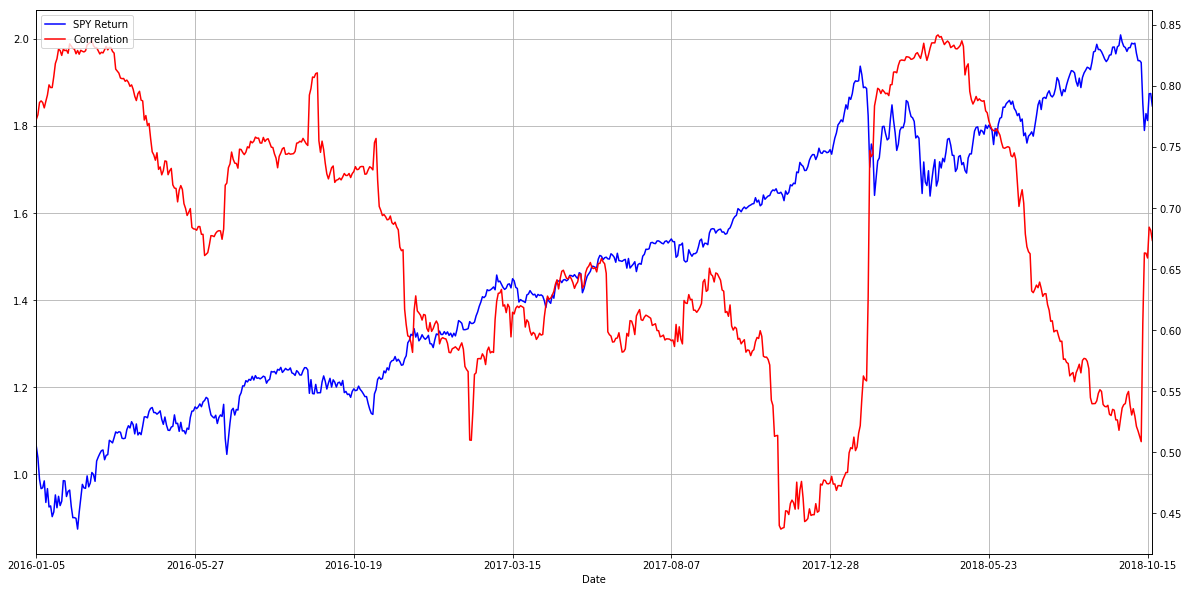

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-10-12  0.492820  0.889005  0.769311  0.871457  0.512850  0.234899   
2018-10-15  0.478333  0.890293  0.761975  0.871014  0.500660  0.225269   
2018-10-16  0.532334  0.907499  0.780780  0.886814  0.536781  0.272353   
2018-10-17  0.537344  0.905306  0.775341  0.885260  0.535126  0.269248   
2018-10-18  0.509434  0.906248  0.775993  0.885698  0.505775  0.253111   

                 XLB       XLE       XLY       XLF  Avg_Corr   SPY_cum  
2018-10-12  0.640646  0.625010  0.872420  0.722024  0.663044  1.828443  
2018-10-15  0.639786  0.628712  0.870967  0.724222  0.659123  1.812556  
2018-10-16  0.667870  0.621229  0.883684  0.754350  0.684369  1.874055  
2018-10-17  0.663802  0.615506  0.884840  0.744730  0.681650  1.874568  
2018-10-18  0.655889  0.602344  0.887044  0.753705  0.673524  1.845971  


In [3]:
rolling_window = 60
plot_window = 10000

corr_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

## Barbell Hedging

In [9]:
ratios = spx_put_backratios(50, 5, 0.05, 2, 50)

C:\Users\Fang\Desktop\Python Trading\Trading\Trading\Modules\Options\optionsFunctions.py:321: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Fang\Desktop\Python Trading\Trading\Trading\Modules\Options\optionsFunctions.py:322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
ratios[(ratios.DTE == 7)]

,index,Strike,Expiry,DTE,Type,IV,Underlying_Price,Last,Bid,Ask,Moneyness,Mid,Short_Strike,Short_Mid,Credit
14,12,2715.0,2018-10-26,7,put,0.218407,2779.97,14.45,13.3,13.7,0.023371,13.50,2775.0,29.40,2.40
18,21,2670.0,2018-10-26,7,put,0.245567,2779.97,8.25,7.7,8.0,0.039558,7.85,2730.0,17.55,1.85
20,13,2710.0,2018-10-26,7,put,0.222313,2779.97,12.60,12.7,13.0,0.025169,12.85,2770.0,27.30,1.60
21,15,2700.0,2018-10-26,7,put,0.227394,2779.97,11.80,11.1,11.4,0.028766,11.25,2760.0,24.05,1.55
27,18,2685.0,2018-10-26,7,put,0.235298,2779.97,11.50,9.1,9.4,0.034162,9.25,2745.0,19.85,1.35
30,14,2705.0,2018-10-26,7,put,0.225853,2779.97,14.55,11.9,12.3,0.026968,12.10,2765.0,25.50,1.30
35,17,2690.0,2018-10-26,7,put,0.233345,2779.97,10.23,9.7,10.1,0.032364,9.90,2750.0,20.95,1.15
39,16,2695.0,2018-10-26,7,put,0.230965,2779.97,12.58,10.5,10.8,0.030565,10.65,2755.0,22.35,1.05
44,19,2680.0,2018-10-26,7,put,0.239632,2779.97,9.75,8.7,9.0,0.035961,8.85,2740.0,18.65,0.95
45,20,2675.0,2018-10-26,7,put,0.242760,2779.97,10.20,8.2,8.5,0.037759,8.35,2735.0,17.65,0.95
